In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

data = pd.read_pickle('/home/jinzhuo/ww_dataset/SCMS/aplysia_ganglia/Aplysia_Data.pkl')
sample_info = pd.read_pickle('/home/jinzhuo/ww_dataset/SCMS/aplysia_ganglia/Aplysia_SampleInfo.pkl')
feature_info = pd.read_pickle('/home/jinzhuo/ww_dataset/SCMS/aplysia_ganglia/Aplysia_Features.pkl')

(542,)
4695
2665
12106


/tmp/ipykernel_1185913/4013045426.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax[i].stem(mzs,data[sample_info['types']==types[i]].mean(0),label=types[i],basefmt='darkslateblue',markerfmt=' ',linefmt='darkslateblue',


3874
5212
3841


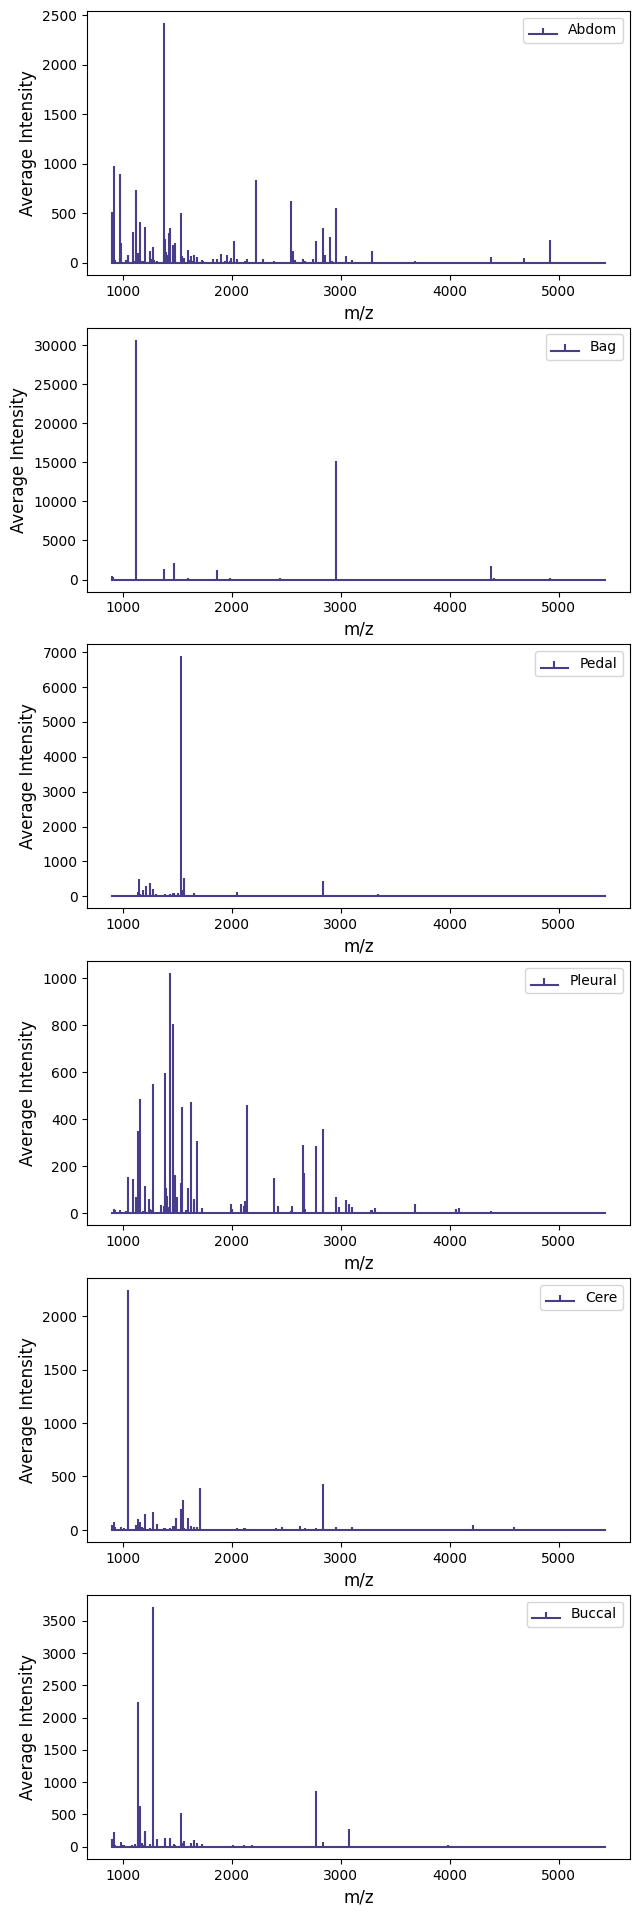

In [3]:
# len(set(sample_info['slide_num']))
# data
# types = list(set(sample_info['types']))
# mzs = np.array(data.columns)


def plot_avg_spec(data):
    types = list(set(sample_info['types']))
    fig,axes=subplots(len(types),1,figsize=(7,4*len(types)))
    ax = axes.ravel()
    
    mzs = np.array(data.columns)
    print(mzs.shape)
    for i in range(len(types)):
        num = data[sample_info['types']==types[i]].shape[0]
        print(num)
        ax[i].stem(mzs,data[sample_info['types']==types[i]].mean(0),label=types[i],basefmt='darkslateblue',markerfmt=' ',linefmt='darkslateblue',
                  use_line_collection=True)
        ax[i].set_ylabel('Average Intensity',fontsize=12)
        ax[i].set_xlabel('m/z',fontsize=12)
        ax[i].legend()
plot_avg_spec(data=data)
# sample_info

In [ ]:
from umap import UMAP
import matplotlib.pyplot as plt
umap = UMAP()
data1 = data.values
print(data1.shape)
embedding = umap.fit_transform(data1)
x_coords = [x for x, y in embedding]
y_coords = [y for x, y in embedding]
colors = ['red', 'blue', 'green', 'purple', 'orange','c','y','m','k']
type_list = list(sample_info['types'])
type_set = list(set(sample_info['types']))
label_added = {}
for i in range(len(type_list)):
    num = type_set.index(type_list[i])
    if type_set[num] not in label_added:
    # plt.scatter(x_coords[i], y_coords[i], c=colors[num],label = type_set[num],alpha=1,s = 2)
        plt.scatter(x_coords[i], y_coords[i], c=colors[num],label = type_set[num],alpha=1,s = 2)
        label_added[type_set[num]] = True
    else:
        plt.scatter(x_coords[i], y_coords[i], c=colors[num],alpha=1,s = 2)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(loc = 'upper right')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
data['type'] = sample_info['types']
# data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def split_data(data,test_size,random_state):

    X_train, X_test, y_train, y_test = train_test_split(data.drop('type',axis = 1).values, data['type'].values, 
                                                        test_size=test_size,
                                                        random_state=random_state)
    print(y_train)
    y_train = le.fit_transform(y_train)
    print(y_train)
    y_test = le.fit_transform(y_test)

    data_dict = {'X_train':X_train,'X_test':X_test,'y_train':y_train,'y_test':y_test}

    return data_dict

data_dict_icc = split_data(data = data,test_size=0.2,random_state=11)

['Cere' 'Abdom' 'Pedal' ... 'Pedal' 'Buccal' 'Buccal']
[3 0 4 ... 4 2 2]


In [5]:
import xgboost
from sklearn.metrics import classification_report 
model = xgboost.XGBClassifier(n_estimators=600,subsample=0.8)
def train_model(model,data_dict):
    
    model.fit(data_dict['X_train'],data_dict['y_train'])

    y_pred = model.predict(data_dict['X_test'])
    prob = model.predict_proba(data_dict['X_test'])
    report_dict = classification_report(data_dict['y_test'], y_pred, output_dict=True)
    
    return model, y_pred, prob,report_dict

model, y_pred, prob,report_dict = train_model(model,data_dict_icc)

6479


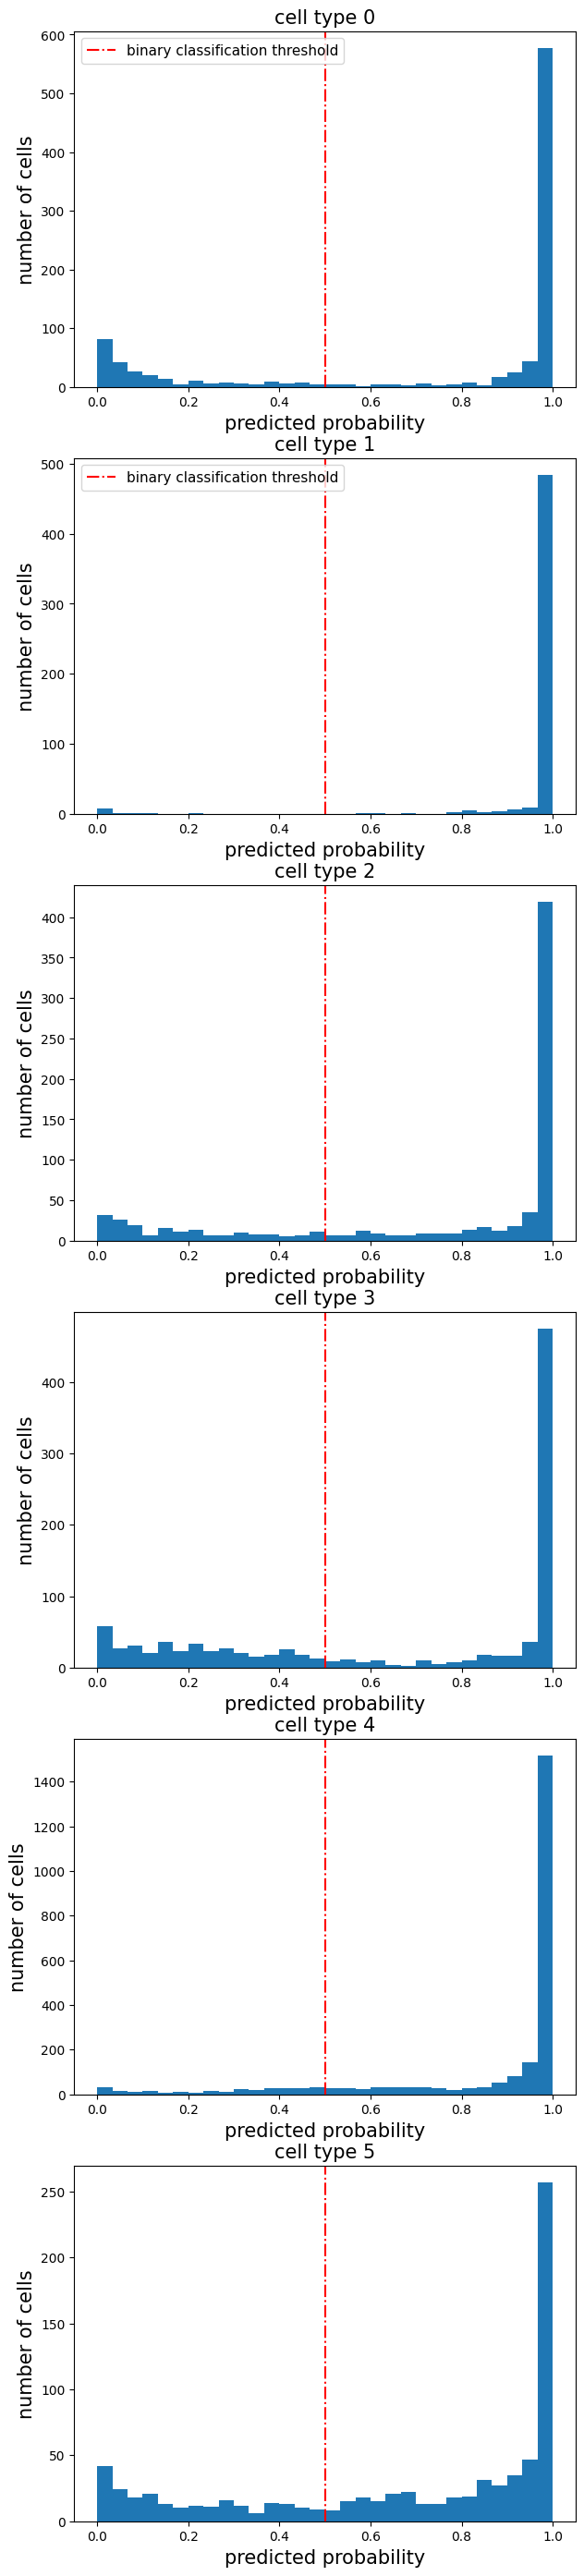

In [6]:
fig,axes = subplots(6,1,figsize=(7,35))
ax = axes.ravel()
ax[0].hist(prob[np.where(data_dict_icc['y_test']==0)[0],0],bins=30)
ax[0].set_title('cell type 0',fontsize=15)
ax[1].hist(prob[np.where(data_dict_icc['y_test']==1)[0],1],bins=30)
ax[1].set_title('cell type 1',fontsize=15)
ax[2].hist(prob[np.where(data_dict_icc['y_test']==2)[0],2],bins=30)
ax[2].set_title('cell type 2',fontsize=15)
ax[3].hist(prob[np.where(data_dict_icc['y_test']==3)[0],3],bins=30)
ax[3].set_title('cell type 3',fontsize=15)
ax[4].hist(prob[np.where(data_dict_icc['y_test']==4)[0],4],bins=30)
ax[4].set_title('cell type 4',fontsize=15)
ax[5].hist(prob[np.where(data_dict_icc['y_test']==5)[0],5],bins=30)
ax[5].set_title('cell type 5',fontsize=15)

ax[0].set_ylabel('number of cells',fontsize=15)
ax[1].set_ylabel('number of cells',fontsize=15)
ax[2].set_ylabel('number of cells',fontsize=15)
ax[3].set_ylabel('number of cells',fontsize=15)
ax[4].set_ylabel('number of cells',fontsize=15)
ax[5].set_ylabel('number of cells',fontsize=15)

ax[0].set_xlabel('predicted probability',fontsize=15)
ax[1].set_xlabel('predicted probability',fontsize=15)
ax[2].set_xlabel('predicted probability',fontsize=15)
ax[3].set_xlabel('predicted probability',fontsize=15)
ax[4].set_xlabel('predicted probability',fontsize=15)
ax[5].set_xlabel('predicted probability',fontsize=15)

ax[0].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[1].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[2].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[3].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[4].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[5].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')

ax[0].legend(fontsize=11,loc=2)
ax[1].legend(fontsize=11)
print(prob.shape[0])
# y_test_label = list(data_dict_icc['y_test'])
# len(list(data_dict_icc['y_test']))
# count = 0
# for i in range(len(list(y_test_label))):
    
#     y_pre = 1
#     if prob[i,0] > 0.5:
#         y_pre = 0
#     else:
#         y_pre = 1
#     if y_pre == y_test_label[i]:
#         count = count+1
#     # print(prob[i,0],y_test_label[i])
# print(count)
# print("accuracy",count/prob.shape[0])
# fig.suptitle("XGBOOST")
# plt.savefig('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/'+'xgboost.svg',format = 'svg',dpi = 300)



In [7]:
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from shap import TreeExplainer, DeepExplainer, KernelExplainer, LinearExplainer

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [8]:
import shap
shap_explainer = TreeExplainer(model)
shap_values = shap_explainer.shap_values(data.drop(['type'],axis =1))

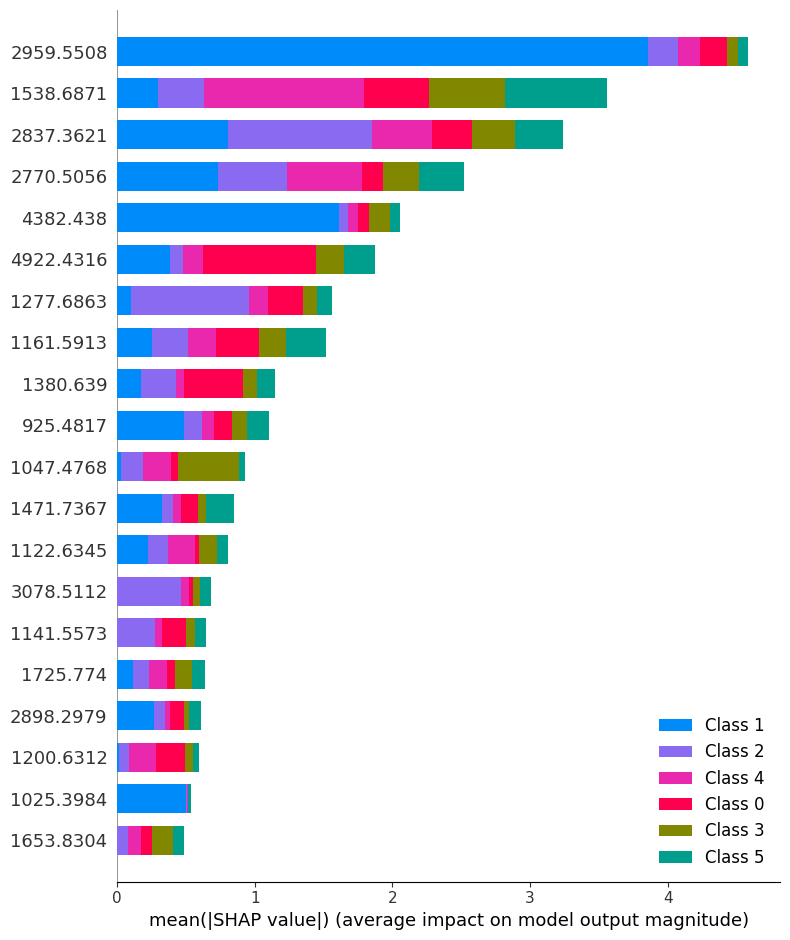

In [9]:
shap.summary_plot(shap_values, data.drop(['type'],axis =1), plot_type="bar")

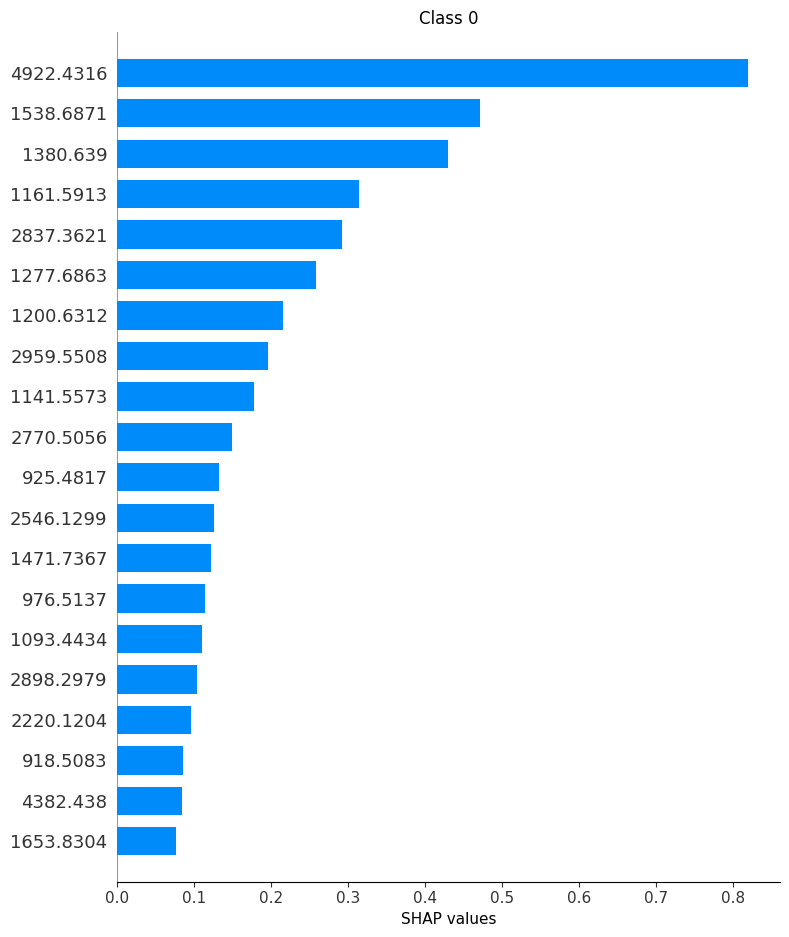

In [10]:
fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(111)
ax0.title.set_text('Class 0')
shap.summary_plot(shap_values[0], data.drop(['type'],axis =1), plot_type="bar", show=False)
ax0.set_xlabel(r'SHAP values', fontsize=11)
# plt.subplots_adjust(wspace = 5)

# ax1 = fig.add_subplot(612)
# ax1.title.set_text('Class 1')
# shap.summary_plot(shap_values[1], data.drop(['type'],axis =1), plot_type="bar", show=False)
# # plt.subplots_adjust(wspace = 5)
# ax1.set_xlabel(r'SHAP values', fontsize=11)

# ax2 = fig.add_subplot(613)
# ax2.title.set_text('Class 2')
# shap.summary_plot(shap_values[2], data.drop(['type'],axis =1), plot_type="bar", show=False)
# ax2.set_xlabel(r'SHAP values', fontsize=11)

# ax3 = fig.add_subplot(614)
# ax3.title.set_text('Class 3')
# shap.summary_plot(shap_values[3], data.drop(['type'],axis =1), plot_type="bar", show=False)
# ax3.set_xlabel(r'SHAP values', fontsize=11)

# ax4 = fig.add_subplot(615)
# ax4.title.set_text('Class 4')
# shap.summary_plot(shap_values[4], data.drop(['type'],axis =1), plot_type="bar", show=False)
# ax4.set_xlabel(r'SHAP values', fontsize=11)

# ax5 = fig.add_subplot(616)
# ax5.title.set_text('Class 5')
# shap.summary_plot(shap_values[5], data.drop(['type'],axis =1), plot_type="bar", show=False)
# ax5.set_xlabel(r'SHAP values', fontsize=11)

# plt.tight_layout(pad=3) # You can also use plt.tight_layout() instead of using plt.subplots_adjust() to add space between plots
plt.show()

In [70]:
import torch
from torch.utils.data import Dataset


class MixDataset(Dataset):

    def __init__(self, data_matrix_list, ratio):
        self.data_matrix_list = data_matrix_list
        self.data_matrix_list_noise = data_matrix_list

        self.cell_type_num = len(data_matrix_list)
        self.noise_percentage = 1
        for i in range(self.cell_type_num):
            noise = np.random.uniform(-0.1, 0.1, self.data_matrix_list[i].shape)
            self.data_matrix_list_noise[i] = self.data_matrix_list[i] + self.noise_percentage*noise*self.data_matrix_list[i]
        self.ratio = ratio

    def __getitem__(self, index):
        mix_sample_spec = np.empty((self.cell_type_num,self.data_matrix_list_noise[0].shape[-1]))
        for i in range(self.cell_type_num):
            if self.ratio[i] == 0:
                mix_sample_spec[i] = np.zeros(self.data_matrix_list_noise[0].shape[-1])
            else:
                random_indices = np.random.choice(self.data_matrix_list_noise[i].shape[0], self.ratio[i], replace=False)
                random_samples = self.data_matrix_list_noise[i][random_indices]
                mix_sample_spec[i] = np.sum(random_samples, axis=0)
        mix_sample_spec = np.sum(mix_sample_spec, axis=0)
        mix_sample_spec = mix_sample_spec + np.random.uniform(-0.1, 0.1, mix_sample_spec.shape)*self.noise_percentage*mix_sample_spec
        return mix_sample_spec

    def __len__(self):
        return 

In [71]:
features = data.columns[:-1]

### m/z index select from shap_value ###

shap_index = []
for i in range(6):
    contrib_xgb_best = shap_values[i]
    shap_ranked_index = np.argsort(abs(contrib_xgb_best).mean(0))[::-1]
    shap_index.append(shap_ranked_index)
shap_index = np.array(shap_index)
shap_index = shap_index[:,:30]
shap_index = shap_index.reshape(-1)
shap_index = list(set(list(shap_index)))
print(len(shap_index))

### m/z index select from top intensity ###
mean = []
types = list(set(data['type']))
for i in range(6):
    print(i,data[data['type']==types[i]].shape,types[i])
    mean.append(list(data[data['type']==types[i]].drop(['type'],axis  = 1).mean()))
ref_map = np.array(mean)
n_largest = 20
indices = np.argsort(ref_map, axis=1)[:, -n_largest:]
indices = list(indices.reshape(-1))
unique_list = sorted([x for i, x in enumerate(indices) if x not in indices[:i]])
top_index = unique_list
print(len(top_index))


### m/z index select from combine both ###
combine_index = list(set(shap_index+top_index))
print(len(combine_index))

66
0 (3874, 543) Pleural
1 (2665, 543) Bag
2 (5212, 543) Cere
3 (3841, 543) Buccal
4 (4695, 543) Abdom
5 (12106, 543) Pedal
71
84


In [72]:
data_matrix_list_train = []
data_matrix_list_val = []

ratio_max = []
types = list(set(data['type']))
for i in range(len(types)):
    array_temp = np.array(data[data['type']==types[i]].drop(['type'],axis  = 1))[:,shap_index]
    # 计算每一行的和
    row_sums = np.sum(array_temp, axis=1)

    # 获取按照行和排序的索引
    sorted_indices = np.argsort(row_sums)

    # 根据排序索引对原始数组进行排序
    array_temp = array_temp[sorted_indices]

    array_temp = array_temp[-2500:-500]
    np.random.shuffle(array_temp)
    np.random.shuffle(array_temp)

    data_matrix_list_train.append(array_temp[:1000])
    data_matrix_list_val.append(array_temp[1000:2000])
    print(data_matrix_list_train[i].shape,types[i])
    ratio_max.append(data_matrix_list_train[i].shape[0])
cell_type_ref = ref_map[:,shap_index]
# cell_type_ref

(1000, 66) Pleural
(1000, 66) Bag
(1000, 66) Cere
(1000, 66) Buccal
(1000, 66) Abdom
(1000, 66) Pedal


In [73]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
class MyModel(nn.Module):
    def __init__(self,cell_type_num):
        super(MyModel, self).__init__()
        self.weight = nn.Parameter(torch.randn(1, cell_type_num))  # 定义一个10x10的可学习矩阵

    def forward(self, x):
        output = torch.mm(self.weight,x)  # 使用可学习的矩阵进行矩阵乘法运算
        max_values, _ = torch.max(output, dim=1, keepdim=True)
        output = output/max_values
        return output

In [86]:
MixSample = MixDataset(data_matrix_list_train,[100,150,0,0,0,0])
target = next(iter(MixSample)).reshape(1,-1)
# target = target/6000
max_values = np.max(target, axis=1, keepdims=True)
# # 对每行进行除法运算
target = target / max_values
target = torch.from_numpy(target).float()
target
def linear_deconvolution(cell_type_num,target,cell_ref):
    model = MyModel(cell_type_num)
    LEARNING_RATE = 0.001
    lossmse = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    train_step = 40000
    for i in range(train_step):
        output = model(cell_ref)
        loss = lossmse(output,target)
        # print("loss",loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return model.weight/torch.sum(model.weight)
   
linear_deconvolution(2,target,torch.from_numpy(cell_type_ref[[0,1],:]).float())

tensor([[0.3891, 0.6109]], grad_fn=<DivBackward0>)

In [142]:
import random
sample_list = []
for j in range(120):
    ratio = [0,0,0,0,0,0]
    # ratio = [0,control,0,4-control,0,0]
    ratio[0] = random.randint(0, 400)/100
    ratio[1] = 4-ratio[0]

    ratio_num = [int(x*200) for x in  ratio]
    # print(ratio_num)
    MixSample = MixDataset(data_matrix_list_train,ratio_num)
    target = next(iter(MixSample)).reshape(1,-1)
    # target = target/6000
    max_values = np.max(target, axis=1, keepdims=True)
    # 对每行进行除法运算
    target = target / max_values
    target = torch.from_numpy(target).float()
    predict = linear_deconvolution(2,target,torch.from_numpy(cell_type_ref[[0,1],:]).float())
    total_sum = sum(ratio)
    target_ratio = [x / total_sum for x in ratio]
    target_ratio = [target_ratio[0],target_ratio[1]]
    sample_list.append([predict,target_ratio,ratio_num])
    # print(predict,target_ratio,ratio_num)

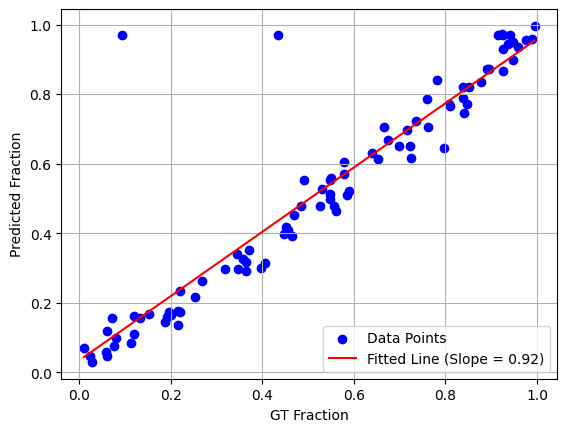

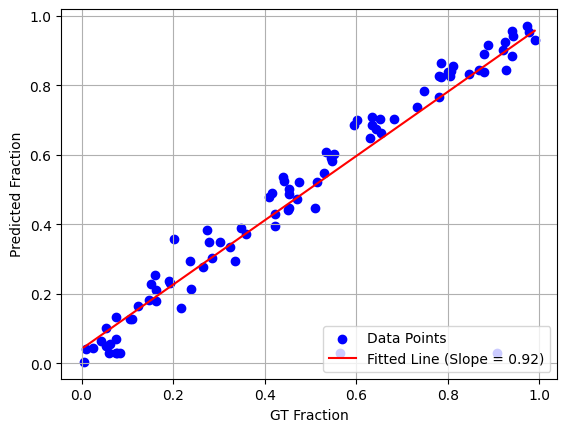

In [144]:
output1 = []
output2 = []
target1 = []
target2 = []
for j in  range(len(sample_list)):
    predict,target_ratio,ratio_num = sample_list[j]
    predict1 = predict[:,0].tolist()
    predict2 = predict[:,1].tolist()
    output1.append(predict1)
    output2.append(predict2)
    target_ratio1 = target_ratio[0]
    target_ratio2 = target_ratio[1]
    target1.append(target_ratio1)
    target2.append(target_ratio2)

def ListDimConvert(two_dim_list):
    one_dim_list = [item for sublist in two_dim_list for item in sublist]
    return one_dim_list

def withoutnan(output,target):
    i = 0
    output_without_nan = []
    target_without_nan = []
    for x in output:
        if not np.isnan(x):
            output_without_nan.append(output[i])
            target_without_nan.append(target[i])
        i = i+1
    return output_without_nan,target_without_nan

def plot_point_line(target_list,output_list,savename):
    # Example points
    x_stick = target_list
    y_stick = output_list

    # Create a scatter plot for the points
    plt.scatter(x_stick, y_stick, label='Data Points', color='blue')

    # Fit a linear regression line
    coefficients = np.polyfit(x_stick, y_stick, 1)
    slope = coefficients[0]

    # Create the line equation
    line = np.poly1d(coefficients)
    x_line = np.linspace(min(x_stick), max(x_stick), 100)
    y_line = line(x_line)

    # Plot the regression line
    plt.plot(x_line, y_line, label=f'Fitted Line (Slope = {slope:.2f})', color='red')

    # Add labels and legend
    plt.xlabel('GT Fraction')
    plt.ylabel('Predicted Fraction')
    plt.legend(loc='lower right')

    # Show the plot
    plt.grid(True)
    plt.savefig('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/'+savename,format = 'svg',dpi = 300)
    plt.show()
    


output1 = ListDimConvert(output1)
output2 = ListDimConvert(output2)
output1,target1 = withoutnan(output1,target1)
output2,target2 = withoutnan(output2,target2)
plot_point_line(target1,output1,'2celltype-Pleural.svg')
plot_point_line(target2,output2,'2celltype-Bag.svg')

# plot_point_line(target2,output2)





In [16]:
import torch
import torch.nn as nn
train_step = 1000
class DNNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(DNNModel, self).__init__()
        # 创建一个线性层，输入大小为input_size，输出大小为output_size
        self.linear1 = nn.Linear(input_size, 30)
        # 定义激活函数为ReLU
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(30, 10)
        self.relu1 = nn.ReLU()
        self.linear3 = nn.Linear(10, output_size)

        # self.Soft = nn.Softmax()
        # self.relu1 = nn.ReLU()

    def forward(self, x):
        # 前向传播过程：线性层 -> ReLU激活函数
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu1(out)
        out = self.linear3(out)
        # max_values,_ = torch.max(out, dim=1, keepdim=True)
        out = torch.softmax(out,dim = 1)
        return out
model_dnn = DNNModel(66,2)
torch.cuda.set_device(4)
device = torch.device('cuda')
model_dnn.to(device)

DNNModel(
  (linear1): Linear(in_features=66, out_features=30, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=30, out_features=10, bias=True)
  (relu1): ReLU()
  (linear3): Linear(in_features=10, out_features=2, bias=True)
)

In [ ]:
import random
from sklearn.preprocessing import StandardScaler

def batch_data(batchsize,dim,data_matrix_list):
    batch_target = []
    batch_input = np.empty((batchsize,dim))
    for i in range(batchsize):
        ratio = [0,0,0,0,0,0]
        # ratio = [0,control,0,4-control,0,0]
        ratio[1] = random.randint(0, 400)/100
        ratio[3] = 4-ratio[1]
        total_sum = sum(ratio)
        
        target = [x / total_sum for x in ratio]
        target = [target[1],target[3]]
        batch_target.append(target)

        ratio_num = [int(x*100) for x in ratio]
        # print(ratio_num)
        MixSample = MixDataset(data_matrix_list,ratio_num)
        input = next(iter(MixSample)).reshape(1,-1)
        
        

        # target = target/6000
        max_values = np.max(input, axis=1, keepdims=True)
        # 对每行进行除法运算
        input = input / max_values
        epsilon = 1e-30
        input = np.log(input+epsilon)
        # max_value = np.max(input, axis=1, keepdims=True)
        # input = input / max_value
        
        batch_input[i] = input
    batch_input = torch.from_numpy(batch_input).float()
    batch_target = torch.from_numpy(np.array(batch_target)).float()
    return batch_input,batch_target

In [ ]:
from torch import nn
from torch.optim import Adam
import random

loss_train_plt = []
loss_val_plt = []

loss_min = 1000
min_sample_trian = []
min_sample_val = []




LEARNING_RATE = 0.001
lossmse = nn.MSELoss()
optimizer = Adam(model_dnn.parameters(), lr=LEARNING_RATE)
for i in range(train_step):
    model_dnn.train()
    input,target = batch_data(8,66,data_matrix_list_train)
    input,target = input.to(device),target.to(device)
    output = model_dnn(input)
    output = output.reshape(target.shape)
    loss = lossmse(output,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_train_plt.append(loss.item())
    # print("loss",loss)
    # print(target[0],output[0],loss.item())
    # print(loss)
    if i%10==0:
        model_dnn.eval()
        loss_val = 0
        for j in range(100):
            input,target = batch_data(8,66,data_matrix_list_val)
            input,target = input.to(device),target.to(device)
            output = model_dnn(input)
            output = output.reshape(target.shape)
            loss = lossmse(output,target)
            loss_val = loss_val+loss.item()
        loss_val = loss_val/100
        loss_val_plt.append(loss_val)
        print(i,loss_val)
        if loss_val < loss_min:
            loss_min = loss_val
            min_sample_trian = []
            min_sample_val = []
            for k in range(5):
                input,target = batch_data(8,66,data_matrix_list_val)
                input,target = input.to(device),target.to(device)
                output = model_dnn(input)
                output = output.reshape(target.shape)
                min_sample_val.append([output,target,i])

                input,target = batch_data(8,66,data_matrix_list_train)
                input,target = input.to(device),target.to(device)
                output = model_dnn(input)
                output = output.reshape(target.shape)
                min_sample_trian.append([output,target,i])


    

In [ ]:
import matplotlib.pyplot as plt
train_steps = [i for i in range(len(loss_train_plt))]
val_steps = [i*10 for i in range(len(loss_val_plt))]
plt.plot(train_steps, loss_train_plt, label='Train Loss', linestyle='-')
plt.plot(val_steps, loss_val_plt, label='Validation Loss', linestyle='-')
plt.legend()
plt.xlabel('Train Step')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.show()

In [ ]:

def ListDimConvert(two_dim_list):
    one_dim_list = [item for sublist in two_dim_list for item in sublist]
    return one_dim_list

def unzipoutput(min_sample):
    output1 = []
    output2 = []
    target1 = []
    target2 = []
    for i in range(len(min_sample)):
        output,target,j = min_sample[i]
        output1.append(output[:,0].tolist())
        output2.append(output[:,1].tolist())
        target1.append(target[:,0].tolist())
        target2.append(target[:,1].tolist())
    output1 = ListDimConvert(output1)
    output2 = ListDimConvert(output2)
    target1 = ListDimConvert(target1)
    target2 = ListDimConvert(target2)
    return output1,output2,target1,target2,j

def plot_point_line(target_list,output_list):
    # Example points
    x_stick = target_list
    y_stick = output_list

    # Create a scatter plot for the points
    plt.scatter(x_stick, y_stick, label='Data Points', color='blue')

    # Fit a linear regression line
    coefficients = np.polyfit(x_stick, y_stick, 1)
    slope = coefficients[0]

    # Create the line equation
    line = np.poly1d(coefficients)
    x_line = np.linspace(min(x_stick), max(x_stick), 100)
    y_line = line(x_line)

    # Plot the regression line
    plt.plot(x_line, y_line, label=f'Fitted Line (Slope = {slope:.2f})', color='red')

    # Add labels and legend
    plt.xlabel('GT Fraction')
    plt.ylabel('Predicted Fraction')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


output1,output2,target1,target2,j = unzipoutput(min_sample_trian)
plot_point_line(target1,output1)


# min_sample_trian[0][0][0][0].item()


#  column = tensor[:, column_idx]

In [ ]:
output1,output2,target1,target2,j = unzipoutput(min_sample_val)
plot_point_line(target1,output1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example points
x_stick = target1
y_stick = output1

# Create a scatter plot for the points
plt.scatter(x_stick, y_stick, label='Data Points', color='blue')

# Fit a linear regression line
coefficients = np.polyfit(x_stick, y_stick, 1)
slope = coefficients[0]

# Create the line equation
line = np.poly1d(coefficients)
x_line = np.linspace(min(x_stick), max(x_stick), 100)
y_line = line(x_line)

# Plot the regression line
plt.plot(x_line, y_line, label=f'Fitted Line (Slope = {slope:.2f})', color='red')

# Add labels and legend
plt.xlabel('GT Fraction')
plt.ylabel('Predicted Fraction')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pickle
# loss_train_plt = []
# loss_val_plt = []

# loss_min = 1000
# min_sample_trian = []
# min_sample_val = []
# import pickle
# with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/loss_train_plt.pkl', 'wb') as file:
#     pickle.dump(loss_train_plt, file)
# with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/loss_val_plt.pkl', 'wb') as file:
#     pickle.dump(loss_val_plt, file)
# with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/min_sample_trian.pkl', 'wb') as file:
#     pickle.dump(min_sample_trian, file)
# with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/min_sample_val.pkl', 'wb') as file:
#     pickle.dump(min_sample_val, file)


with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/loss_train_plt.pkl', 'rb') as file:
    loss_train_plt = pickle.load(file)
with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/loss_val_plt.pkl', 'rb') as file:
    loss_val_plt= pickle.load(file)

with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/min_sample_trian.pkl', 'rb') as file:
    min_sample_trian = pickle.load(file)

with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/Figure2/min_sample_val.pkl', 'rb') as file:
    min_sample_val = pickle.load(file)

